In [1]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2,mi1,mi2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2, mi1, mi2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + mi1 * (x1 - L1)**3 + k2 * (x2 - x1 - L2) - mi2 * (x2 - x1 - L2)**3 ) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2) + mi2 * (x2 - x1 - L2)**3) / m2]
    return f

In [2]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint
import numpy as np
import math

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 0.4
k2 = 1.808
# Natural lengths
L1 = 0.0
L2 = 0.0
# Friction coefficients
b1 = 0.0
b2 = 0.0
# Nonlinear coefficients
mi1=-1/6
mi2=-1/10

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 1.0
y1 = 0.0
x2 = -0.5
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 50.0
numpoints = 2000

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, mi1, mi2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('Ejemplo3_1.dat', 'w') as E31:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print(t1, w1[0], w1[1], w1[2], w1[3], file=E31)

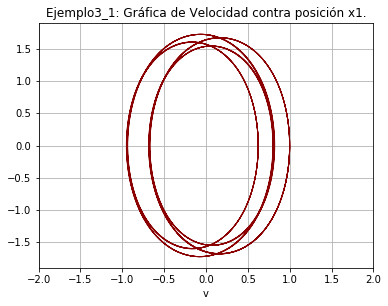

In [3]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, xlim
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('Ejemplo3_1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('v')
grid(True)
lw = 1

plot(x1, y1, 'darkred', linewidth=lw)
xlim(-2,2)

title('Ejemplo3_1: Gráfica de Velocidad contra posición x1.')
savefig('Ejemplo3_1Velocidad1.png', dpi=100)

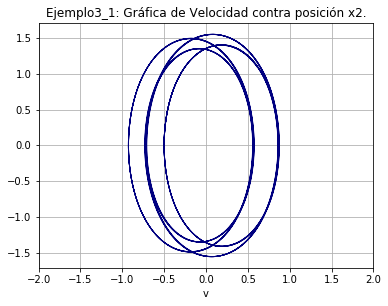

In [4]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig,xlim
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('Ejemplo3_1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('v')
grid(True)
lw = 1

plot(x2, y2, 'navy', linewidth=lw)
xlim(-2,2)

title('Ejemplo3_1: Gráfica de Velocidad contra posición x2.')
savefig('Ejemplo3_1Velocidad2.png', dpi=100)

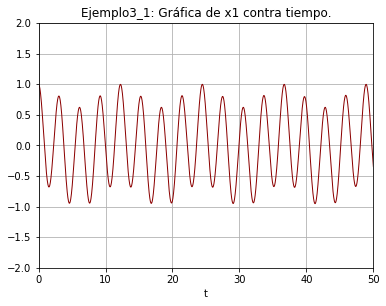

In [2]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, ylim, xlim
from matplotlib.font_manager import FontProperties
%matplotlib inline
t, x1, xy, x2, y2= loadtxt('Ejemplo3_1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1

plot(t, x1, 'darkred', linewidth=lw)
ylim(-2,2)
xlim(0,50)

title('Ejemplo3_1: Gráfica de x1 contra tiempo.')
savefig('Ejemplo3_1Oscilaciones1.png', dpi=100)

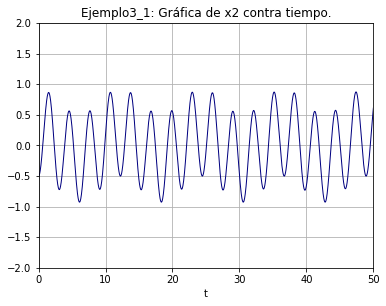

In [5]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, ylim, xlim
from matplotlib.font_manager import FontProperties
%matplotlib inline
t, x1, xy, x2, y2= loadtxt('Ejemplo3_1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1

plot(t, x2, 'navy', linewidth=lw)
ylim(-2,2)
xlim(0,50)

title('Ejemplo3_1: Gráfica de x2 contra tiempo.')
savefig('Ejemplo3_1Oscilaciones2.png', dpi=100)

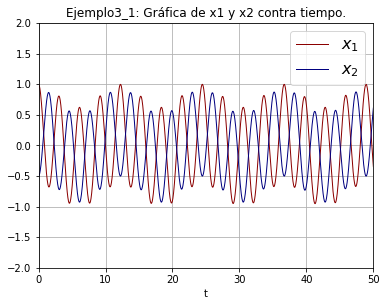

In [6]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, ylim, xlim
from matplotlib.font_manager import FontProperties
%matplotlib inline
t, x1, xy, x2, y2= loadtxt('Ejemplo3_1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1

plot(t, x1, 'darkred', linewidth=lw)
plot(t, x2, 'navy', linewidth=lw)
ylim(-2,2)
xlim(0,50)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Ejemplo3_1: Gráfica de x1 y x2 contra tiempo.')
savefig('Ejemplo3_1Oscilaciones.png', dpi=100)

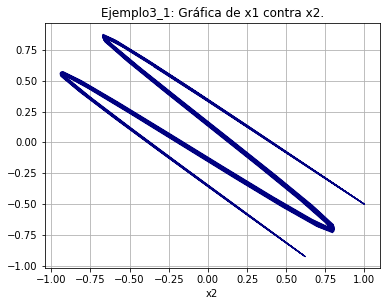

In [21]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('Ejemplo3_1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('x2')
grid(True)
lw = 1

plot(x1, x2, 'navy', linewidth=lw)

title('Ejemplo3_1: Gráfica de x1 contra x2.')
savefig('Ejemplo3_1Posiciones.png', dpi=100)